# Lab 2

- Statistical summary of data
- Correlation of data
- Deal with categorical data
- Deal with missing data
- Normalise data

# Imports 

In [1]:
# conda env create -f env.yaml 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Data setup

Link to data: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

## Data Attributes

- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:
- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

In [2]:
data_math = pd.read_csv(r"./Data/student-mat.csv")
data_port = pd.read_csv(r"./Data/student-por.csv")

In [3]:
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
# Maybe add class attribute if combining
data_math["class"] = "math"
data_port["class"] = "portuguese"

df = pd.concat([data_math, data_port], ignore_index=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,portuguese
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,portuguese
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,portuguese
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,portuguese


In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math


#### To be decided by group

In [7]:
#combine the G scores?

# G3 seems like it is already the combined value
# G1 - first period grade (numeric: from 0 to 20)
# G2 - second period grade (numeric: from 0 to 20)
# G3 - final grade (numeric: from 0 to 20, output target)

# df["score"] = (df["G1"] + df["G2"] + df["G3"]) / 3
# df.drop(["G1","G2","G3"], axis = 1, inplace = True)

In [8]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,portuguese
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,portuguese
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,portuguese
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,portuguese


# Statistical Summary and Correlation

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [10]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


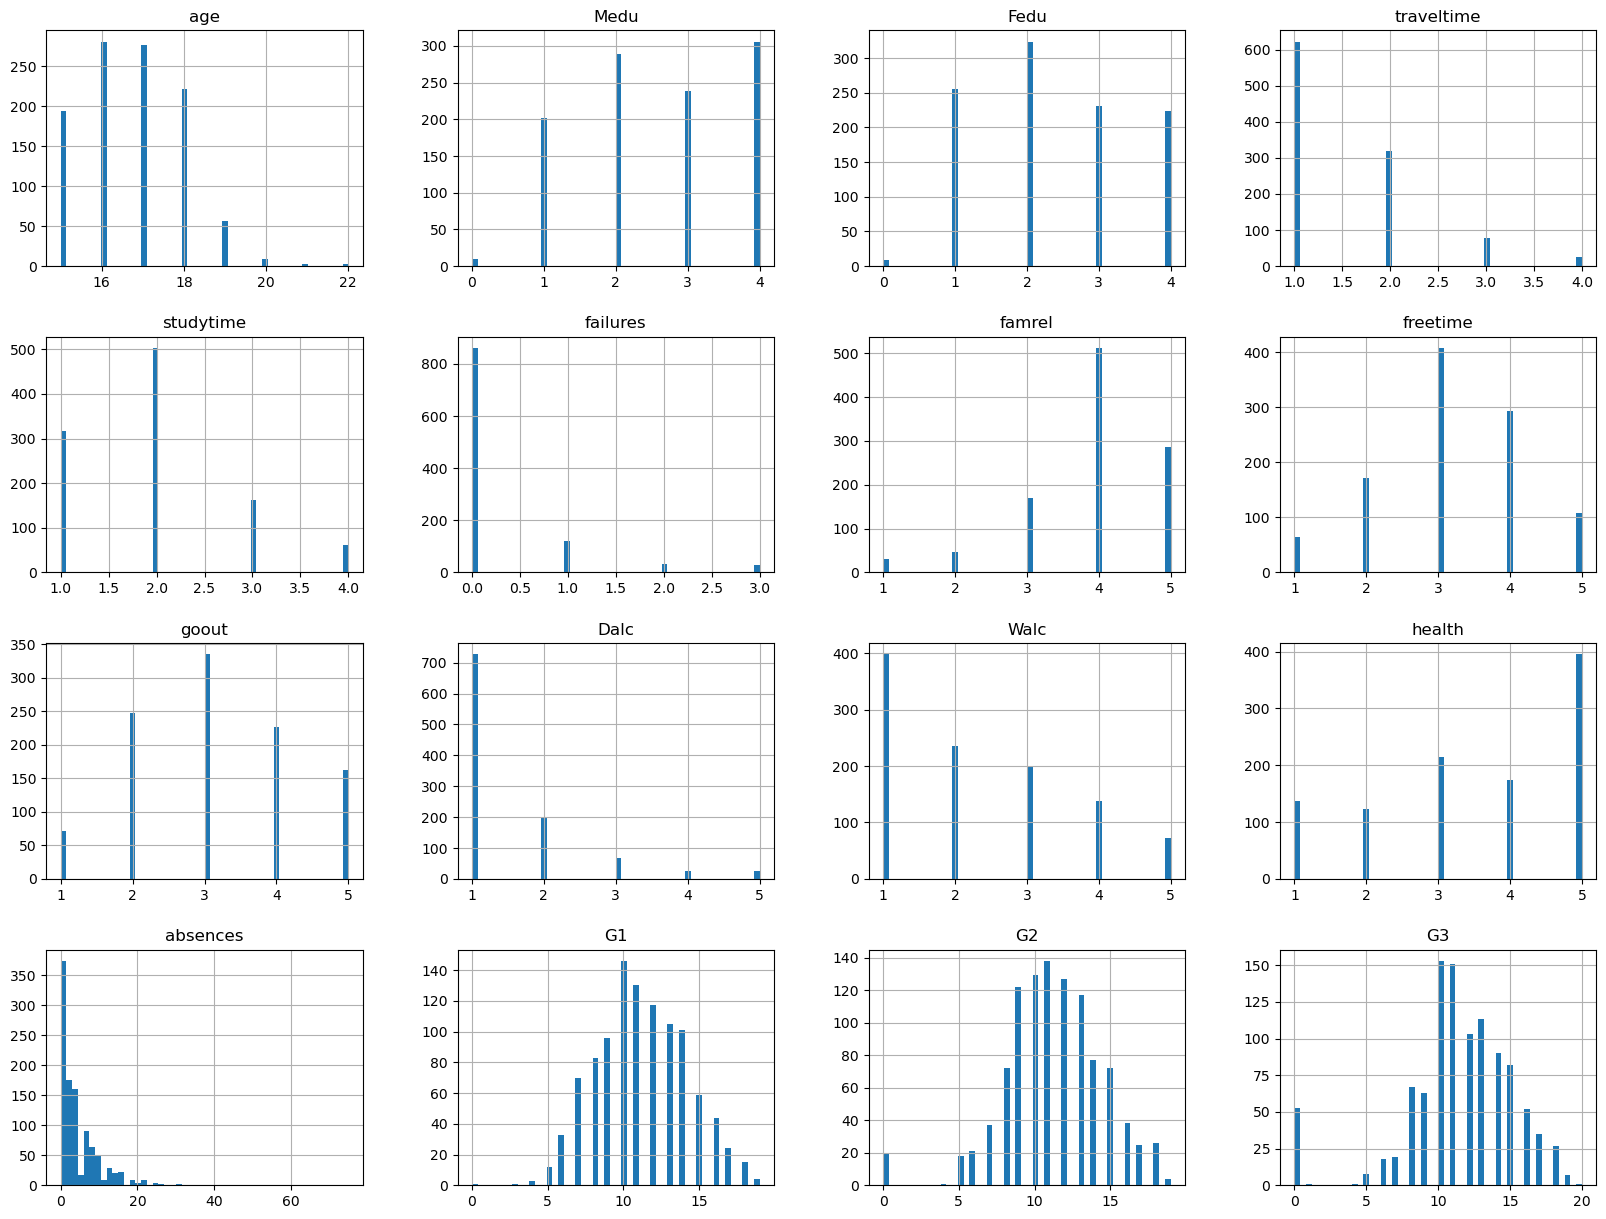

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show()

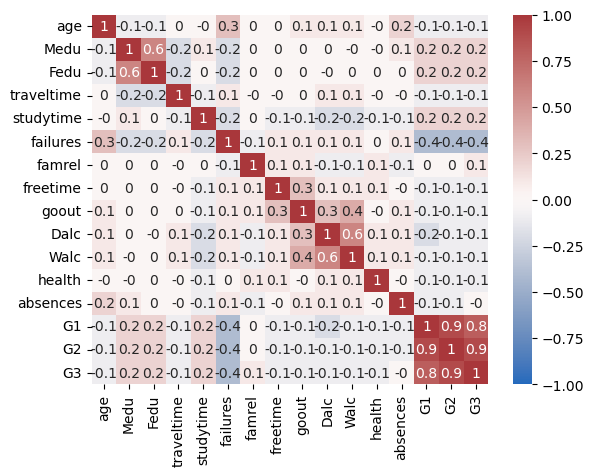

In [12]:
corr_matrix = df.corr().round(1)
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [13]:
print(df.corr()["G3"].sort_values(ascending = False))

G3            1.000000
G2            0.910743
G1            0.809142
Medu          0.201472
studytime     0.161629
Fedu          0.159796
famrel        0.054461
absences     -0.045671
freetime     -0.064890
health       -0.080079
goout        -0.097877
traveltime   -0.102627
Walc         -0.115740
age          -0.125282
Dalc         -0.129642
failures     -0.383145
Name: G3, dtype: float64


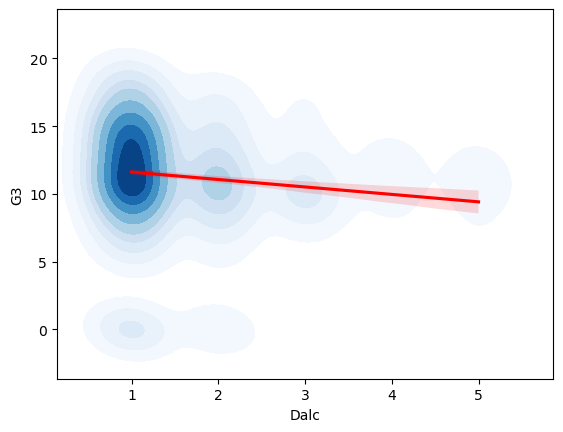

c:\Users\camer\miniconda3\envs\F20DLenv\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(


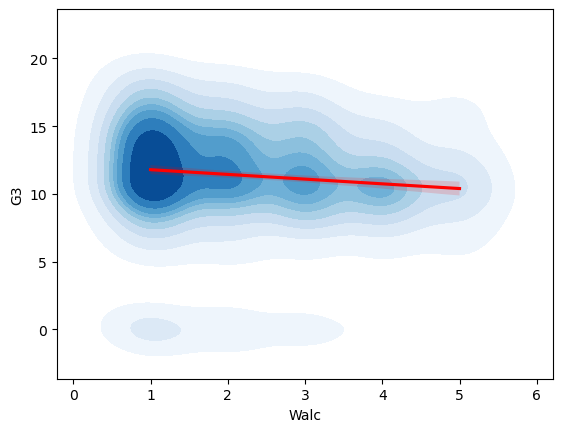

In [38]:
# Maybe remove score outliers?

fig, ax = plt.subplots()
sns.kdeplot(x=df["Dalc"], y=df["G3"], cmap="Blues", shade=True,)
sns.regplot(x=df["Dalc"], y=df["G3"], marker=" ", color="Red")
plt.show()

fig, ax = plt.subplots()
sns.kdeplot(x=df["Walc"], y=df["G3"], cmap="Blues", shade=True)
sns.regplot(x=df["Walc"], y=df["G3"], marker=" ", color="Red")
plt.show()

# No missing data

# Categorical data

In [15]:
from sklearn.preprocessing import OneHotEncoder

#### Label encoding

In [16]:
le = preprocessing.LabelEncoder()

df["school"] = le.fit_transform(df["school"])
df["sex"] = le.fit_transform(df["sex"])
df["address"] = le.fit_transform(df["address"])
df["famsize"] = le.fit_transform(df["famsize"])
df["Pstatus"] = le.fit_transform(df["Pstatus"])
df["schoolsup"] = le.fit_transform(df["schoolsup"])
df["famsup"] = le.fit_transform(df["famsup"])
df["paid"] = le.fit_transform(df["paid"])
df["activities"] = le.fit_transform(df["activities"])
df["nursery"] = le.fit_transform(df["nursery"])
df["higher"] = le.fit_transform(df["higher"])
df["internet"] = le.fit_transform(df["internet"])
df["romantic"] = le.fit_transform(df["romantic"])

# TODO: encode columns 10,11,12 

#### One Hot Encoding 

In [17]:
OHE = OneHotEncoder(drop = "first", sparse=False)
ohe_mjob = OHE.fit_transform(np.array(df["Mjob"]).reshape(-1,1))

df["Mjob_health"] = ohe_mjob[:,0] 
df["Mjob_other"] = ohe_mjob[:,1] 
df["Mjob_services"] = ohe_mjob[:,2] 
df["Mjob_teacher"] = ohe_mjob[:,3] 

df.drop(["Mjob"], axis = 1, inplace = True)

In [18]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Fjob,reason,...,health,absences,G1,G2,G3,class,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,0,0,18,1,0,0,4,4,teacher,course,...,3,6,5,6,6,math,0.0,0.0,0.0,0.0
1,0,0,17,1,0,1,1,1,other,course,...,3,4,5,5,6,math,0.0,0.0,0.0,0.0
2,0,0,15,1,1,1,1,1,other,other,...,3,10,7,8,10,math,0.0,0.0,0.0,0.0
3,0,0,15,1,0,1,4,2,services,home,...,5,2,15,14,15,math,1.0,0.0,0.0,0.0
4,0,0,16,1,0,1,3,3,other,home,...,5,4,6,10,10,math,0.0,1.0,0.0,0.0


In [19]:
df.iloc[0]

school                 0
sex                    0
age                   18
address                1
famsize                0
Pstatus                0
Medu                   4
Fedu                   4
Fjob             teacher
reason            course
guardian          mother
traveltime             2
studytime              2
failures               0
schoolsup              1
famsup                 0
paid                   0
activities             0
nursery                1
higher                 1
internet               0
romantic               0
famrel                 4
freetime               3
goout                  4
Dalc                   1
Walc                   1
health                 3
absences               6
G1                     5
G2                     6
G3                     6
class               math
Mjob_health          0.0
Mjob_other           0.0
Mjob_services        0.0
Mjob_teacher         0.0
Name: 0, dtype: object

# Min-Max Scaling

In [20]:
#categorical features need to be converted first
#X_scaled = (X - np.amin(X)) / (np.amax(X) - np.amin(X))
#X_scaled